In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.integrate import odeint

# Kuramoto model
$$ \dot \varphi_i = \omega_i + \frac K N \sum_{j=1}^N{a_{ij}}\sin(\varphi_j - \varphi_i)$$

0.10509131721252933
(2000,)


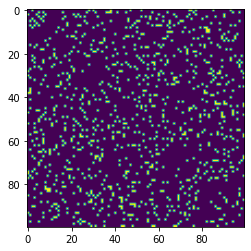

In [2]:
#define all needed variables
N = 100
phi = np.zeros(N)
omega = np.random.uniform(low=-1, high=1, size=(N))
# omega = omega**3 - 0.3*omega
K = 9.5

def make_A(N, p = 1):
    #make an adjaceny matrix with p chance that any two give oscillators are connected. 
    #p = 1 is fully connected. 
    A = np.zeros((N,N))
    for i in range(N):
        for j in range(i+1,N):
            if(np.random.uniform() < p):
                A[i,j] = 1
                A[j,i] = 1
    return A

# A = np.ones((N,N)) - np.eye(N) #this is all to all right now, but want to make it so you can set the number of connections
A = make_A(N, p = 0.1)
print(np.sum(A)/((N-1)**2))
plt.figure()
plt.imshow(A)
dt = 0.01 #timestep size, if this is too large, weird things seem to be happening
T_max = 20 #maximum time to run simulation for
t = np.arange(0, T_max, dt)
print(t.shape)

In [3]:
def phi_dot(phi, t, omega, K, A):
    N = len(phi)
    dphi_dt = np.zeros(np.shape(phi))
    for i in range(N):
        dphi_dt[i] = omega[i] + K/N *np.sum(A[i]@np.sin(phi - phi[i]))
    return dphi_dt

def run_and_graph(omega, K=10, T_max =20, dt = 0.01, p = 1, N = 100):
    plt.figure()
#     if A is None:
    A = make_A(N, p = p)
    sol = odeint(phi_dot, np.random.uniform(0,1,size = (N)), np.arange(0, T_max, dt), args=(omega, K, A))
    for i in range(min(10, N)):
        plt.plot(np.arange(0, T_max, dt), sol[:,i])
    plt.plot(np.linspace(0,T_max), np.linspace(0,T_max)*np.mean(omega) + np.mean(sol[0,:]), 'black', linewidth = 2)
    plt.xlabel("time")
    plt.ylabel("solution value ")
    plt.title("first 10 phases with p = "+ str(p))
    plt.show()

[-16.17822649  -3.28230561  14.03515876  -2.82714366 -16.63617681
  -2.24393565  -1.11324602  -6.73947345  -8.58815335   6.9063766
  14.88575445  22.72077482 -11.09894976  -8.43868007   5.3212
  -4.08877286   5.37043544   5.12102134  -8.13733117 -15.12126351
  -2.80961485  13.66612026   6.03987521  16.51071504  -4.84525451
 -18.09829921  -2.73347045  -1.49120743  15.10230085  13.89725341
  -8.83441612  -3.11769297   4.82495643  -4.64009252 -15.22875913
   5.65608412 -15.32997617  17.21543795 -15.77088113  -1.75979374
 -17.96454443  -2.82839089   4.29396089   9.07062459   7.94800588
 -10.51549562 -16.99590989  -9.39342199  13.84520392   4.97435404
   6.43014932  -2.02053681  16.49950605  14.40444385  16.56535601
 -14.67649032   4.37865396  -9.58545817  -2.92726264 -15.10646151
  -2.62532389  14.69968105 -10.10151358   8.18417442  15.57701354
  12.98595739 -22.01695581  10.72781158  -3.37594119  17.27669439
 -15.58661389  -9.76929124  -2.64895626  16.72434505 -15.92261005
 -10.54213281 -

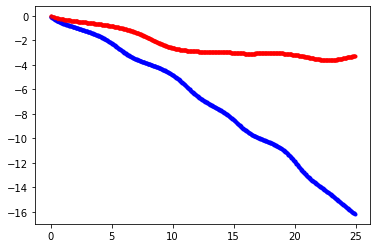

In [4]:
n_timestep = 500
dt = 0.05
t = 0
phi = np.zeros(N)
for i in range(n_timestep):
    phi += phi_dot(phi, t, omega, K, A)*dt
#     print(phi)
#     for j in range(len(phi)):
#         if(phi[j]<0):
#             phi[j] += 2*np.pi
#         if(phi[j]>(2*np.pi)):
#             phi[j] -= 2*np.pi
    plt.plot(t, phi[0], 'b.')
    plt.plot(t, phi[1], 'r.')
    t += dt
print(phi)

In [5]:
#do the integration part
A = make_A(N, p = 0.1)
sol = odeint(phi_dot, np.random.uniform(0,1,size = (N)), np.arange(0, T_max, dt), args=(omega, K, A))

(400, 100)


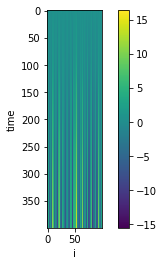

In [6]:
print(sol.shape)
plt.imshow(sol)
plt.xlabel("i")
plt.ylabel("time")
plt.colorbar()

-0.04406405601627886


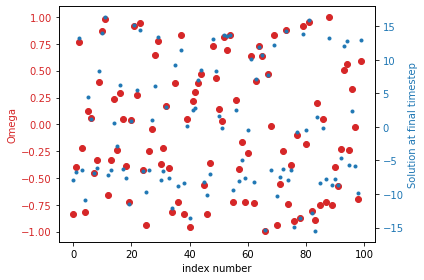

In [7]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('index number')
ax1.set_ylabel('Omega', color=color)
# omega_test = omega +np.random.uniform(0,1, size = (omega.shape))
ax1.plot(omega, 'o', color=color,linewidth=7.0)
print(np.mean(omega))
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Solution at final timestep', color=color)  # we already handled the x-label with ax1
ax2.plot(sol[-1,:], '.', color=color, linewidth=2.0)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

(400, 100)
-0.04406405601627886


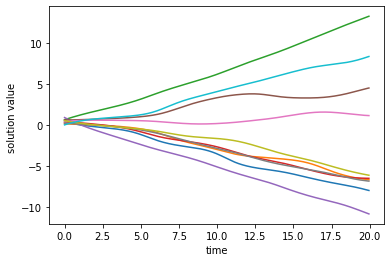

In [8]:
print(sol.shape)
# plt.plot(np.sin(sol[:,0]))
# plt.plot(sol[:,0])
# plt.plot(sol[:,1])
# plt.plot(sol[:,2])
for i in range(10):
    plt.plot(np.arange(0, T_max, dt), sol[:,i])
plt.xlabel("time")
plt.ylabel("solution value ")

# plt.plot(np.linspace(0,20), np.linspace(0,20)*np.mean(omega) + np.mean(sol[0,:]), 'black', linewidth = 2)

print(np.mean(omega))
# plt.plot(np.sin(sol[:,1]))
# plt.plot(np.sin(sol[:,2]))

In [9]:
u, s, vh = np.linalg.svd(sol)

[1.01334027e+03 6.66967200e+01 3.27480360e+01 2.38565814e+01
 1.95142775e+01 1.40837105e+01 1.01728668e+01 9.53260312e+00
 5.84090871e+00 4.67159302e+00 2.44939803e+00 1.87511834e+00
 1.31732881e+00 8.48732967e-01 6.35510947e-01 4.57609090e-01
 3.84448624e-01 3.39344389e-01 1.83124269e-01 1.10416222e-01
 9.76039384e-02 6.41037804e-02 5.51284212e-02 3.71381895e-02
 2.95012921e-02 2.29371438e-02 1.78232606e-02 1.11129999e-02
 7.56500852e-03 5.37294774e-03 4.39505988e-03 4.17862680e-03
 2.31211124e-03 1.53701019e-03 1.40222282e-03 1.11742072e-03
 8.27363161e-04 7.13632976e-04 4.97937851e-04 3.50256549e-04
 2.64555565e-04 1.83341221e-04 1.56072475e-04 1.13079049e-04
 8.43811935e-05 6.59242948e-05 4.52491099e-05 3.85005879e-05
 3.07752087e-05 1.87497013e-05 1.33162132e-05 9.67114416e-06
 8.03824682e-06 6.13888241e-06 5.61804304e-06 3.18321132e-06
 2.18285508e-06 1.60317900e-06 1.04132963e-06 9.42407343e-07
 7.56053590e-07 5.86086997e-07 5.53467301e-07 3.21913317e-07
 2.63364290e-07 1.683628

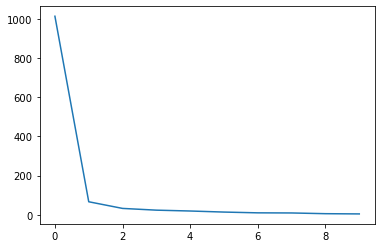

In [10]:
plt.plot(s[:10])
print(s)
# plt.plot([0,100], [0,0])

In [11]:
n_important = 3

print(u[:,:n_important].shape)
print(np.diag(s[:n_important]).shape)
print(vh[:n_important,:].shape)
low_rank = (u[:,:n_important]@np.diag(s[:n_important]))@vh[:n_important, :]

(400, 3)
(3, 3)
(3, 100)


MSE error =  0.035287636241093656


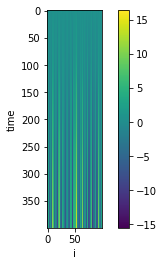

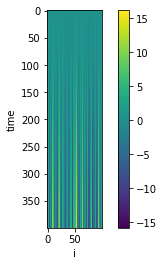

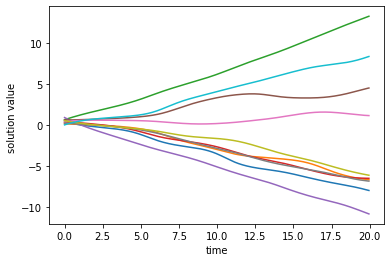

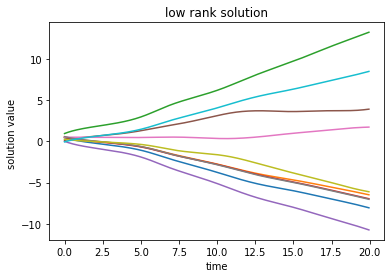

In [13]:
print("MSE error = ", ((low_rank - sol)**2).mean())

plt.imshow(sol)
plt.xlabel("i")
plt.ylabel("time")
plt.colorbar()
plt.show()

plt.imshow(low_rank)
plt.xlabel("i")
plt.ylabel("time")
plt.colorbar()
plt.show()

for i in range(10):
    plt.plot(np.arange(0, T_max, dt), sol[:,i])
plt.xlabel("time")
plt.ylabel("solution value ")
plt.show()


for i in range(10):
    plt.plot(np.arange(0, T_max, dt), low_rank[:,i])
plt.xlabel("time")
plt.ylabel("solution value ")
plt.title("low rank solution")
plt.show()


In [17]:
error_list = []
for i in range(10):
    u1, s1, vh1 = np.linalg.svd(sol, full_matrices=True)
    low_rank1 = (u1[:,:i]@np.diag(s1[:i]))@vh1[:i, :]
    error_list.append(( (low_rank1 - sol)**2).mean())

[25.84477211958096, 0.17330979445019354, 0.062098482866811994, 0.035287636241093656, 0.021059224374328847, 0.011539048734474526, 0.006580276192919723, 0.003993095741011446, 0.0017213326872642255, 0.0008684273224263464]
[1013.34026517   66.69672003   32.74803605   23.85658137   19.51427748
   14.08371051   10.17286676    9.53260312    5.84090871    4.67159302]


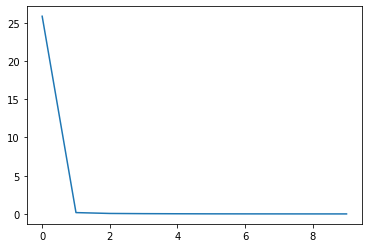

In [18]:
plt.plot(error_list)
print(error_list)
print(s[:10])
# plt.plot(s[:10])

In [ ]:
#the svd stuff all in one block
n_important = 2
A = make_A(N, p = 0.1)
sol = odeint(phi_dot, np.random.uniform(0,1,size = (N)), np.arange(0, T_max, dt), args=(omega, K, A))
u, s, vh = np.linalg.svd(sol)

low_rank = (u[:,:n_important]@np.diag(s[:n_important]))@vh[:n_important, :]

print("MSE error = ", np.linalg.norm(low_rank - sol))
print("MSE error end = ", np.linalg.norm(low_rank[:,-1] - sol[:, -1]))
print(s[:10])

plt.imshow(sol)
plt.xlabel("i")
plt.ylabel("time step number")
plt.title("full solution")
plt.colorbar()
plt.show()

plt.imshow(low_rank)
plt.xlabel("i")
plt.ylabel("time step number")
plt.title("low rank solution")
plt.colorbar()
plt.show()

for i in range(10):
    plt.plot(np.arange(0, T_max, dt), sol[:,i])
plt.xlabel("time")
plt.ylabel("solution value ")
plt.title("full solution")
plt.show()


for i in range(10):
    plt.plot(np.arange(0, T_max, dt), low_rank[:,i])
plt.xlabel("time")
plt.ylabel("solution value ")
plt.title("low rank solution")
plt.show()

In [ ]:
p = 0.1
A = make_A(N, p = p)
sol = odeint(phi_dot, np.random.uniform(0,1,size = (N)), np.arange(0, T_max, dt), args=(omega, K, A))
for i in range(10):
    plt.plot(np.arange(0, T_max, dt), sol[:,i])
plt.xlabel("time")
plt.ylabel("solution value ")
plt.title("first 10 phases with p = "+ str(p))

In [ ]:
p = 0.2
A = make_A(N, p = p)
sol = odeint(phi_dot, np.random.uniform(0,1,size = (N)), np.arange(0, T_max, dt), args=(omega, K, A))
for i in range(10):
    plt.plot(np.arange(0, T_max, dt), sol[:,i])
plt.plot(np.linspace(0,20), np.linspace(0,20)*np.mean(omega) + np.mean(sol[0,:]), 'black', linewidth = 2)

plt.xlabel("time")
plt.ylabel("solution value ")
plt.title("first 10 phases with p = "+ str(p))

In [ ]:
p = 0.5
A = make_A(N, p = p)
sol = odeint(phi_dot, np.random.uniform(0,1,size = (N)), np.arange(0, T_max, dt), args=(omega, K, A))
for i in range(10):
    plt.plot(np.arange(0, T_max, dt), sol[:,i])
plt.plot(np.linspace(0,20), np.linspace(0,20)*np.mean(omega) + np.mean(sol[0,:]), 'black', linewidth = 2)

plt.xlabel("time")
plt.ylabel("solution value ")
plt.title("first 10 phases with p = "+ str(p))

In [ ]:
p = 1
A = make_A(N, p = p)
sol = odeint(phi_dot, np.random.uniform(0,1,size = (N)), np.arange(0, T_max, dt), args=(omega, K, A))
for i in range(10):
    plt.plot(np.arange(0, T_max, dt), sol[:,i])
plt.plot(np.linspace(0,20), np.linspace(0,20)*np.mean(omega) + np.mean(sol[0,:]), 'black', linewidth = 2)

plt.xlabel("time")
plt.ylabel("solution value ")
plt.title("first 10 phases with p = "+ str(p))

In [ ]:
def phi_dot(phi, t, omega, K, A):
    N = len(phi)
    dphi_dt = np.zeros(np.shape(phi))
    for i in range(N):
        dphi_dt[i] = omega[i] + K/N *np.sum(A[i]@np.sin(phi - phi[i]))
    return dphi_dt

def run_and_graph(omega, K=10, T_max =20, dt = 0.01, p = 1, N = 100):
    plt.figure()
#     if A is None:
    A = make_A(N, p = p)
    sol = odeint(phi_dot, np.random.uniform(0,1,size = (N)), np.arange(0, T_max, dt), args=(omega, K, A))
    for i in range(min(10, N)):
        plt.plot(np.arange(0, T_max, dt), sol[:,i])
    plt.plot(np.linspace(0,T_max), np.linspace(0,T_max)*np.mean(omega) + np.mean(sol[0,:]), 'black', linewidth = 2)
    plt.xlabel("time")
    plt.ylabel("solution value ")
    plt.title("first 10 phases with p = "+ str(p))
    plt.show()
    
run_and_graph(omega, p = .1)
run_and_graph(omega, p = .2)
run_and_graph(omega, p = .5)
run_and_graph(omega, p = 1)